In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.integrate import quad

# Part 1 : Random Distribution

### The parameters for point generation are defined as follows :
*   Length of box is 20 for each axes and symmetric about origin.
*   Mass of each particle is assmued to be 1.
*   The number of points taken is 100000.

In [ ]:
L = 10
m = 1
N = 100000

## Point Generation Block

In [ ]:
x_coords = np.zeros(N)
y_coords = np.zeros(N)
z_coords = np.zeros(N)

for i in range (0,N):  #Code for Random Point Generation
  x_coords[i] = random.uniform(-L,L)
  y_coords[i] = random.uniform(-L,L)
  z_coords[i] = random.uniform(-L,L)

## Visulization of the Points Generated

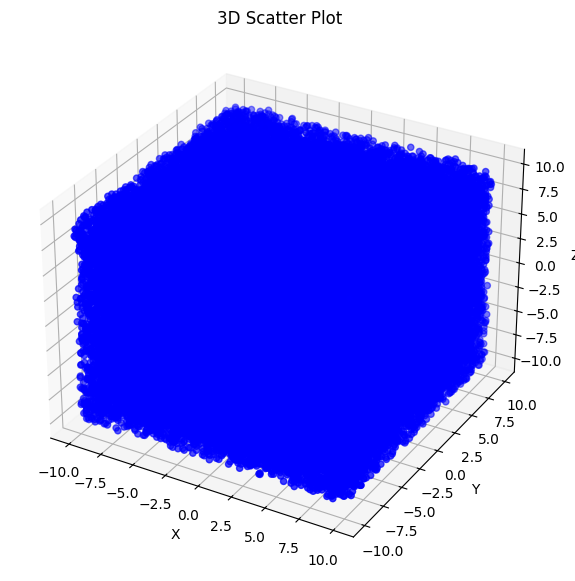

In [ ]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords, y_coords, z_coords, color='blue', marker='o')

ax.set_title("3D Scatter Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

## Defining Discretization array of Radius of Concentric Shells

In [ ]:
shell_number = 50      #The number of shells are 30 starting from r=1 and going till r=10
radii = np.linspace(1, L, num=shell_number)
print(radii)

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]


## Spherically Integrated Density Calculation

In [ ]:
masses = np.zeros(shell_number) # Arrays for shell masses

for i in range(shell_number): # Assign mass to appropriate shell
    for j in range(N):
        dist_sq = x_coords[j]**2 + y_coords[j]**2 + z_coords[j]**2
        r_sq = radii[i]**2
        if i == 0:
            if dist_sq <= r_sq:
                masses[i] += m
        else:
            if radii[i-1]**2 < dist_sq <= r_sq:
                masses[i] += m

cumulative_masses = np.cumsum(masses)   # Compute cumulative mass and spherical volume for each radius
spherical_volumes = (4/3) * math.pi * radii**3

integrated_densities = cumulative_masses / spherical_volumes    # Compute spherically integrated density
print(integrated_densities)

[15.27887454 14.53908327 14.28784248 13.18032364 12.25681547 11.93687855
 11.79778948 12.71459931 12.74675295 12.86078727 12.6020813  12.56268548
 12.86069359 12.90034779 12.81339895 12.89923692 12.85747197 12.78522432
 12.71591592 12.72444613 12.63653927 12.57320608 12.63311168 12.62266571
 12.64904826 12.63779447 12.60139345 12.55021298 12.60200398 12.59943343
 12.58205913 12.55986868 12.55404796 12.54827108 12.53508807 12.49639432
 12.52868154 12.51788803 12.53729991 12.52312608 12.52934782 12.52838828
 12.51036694 12.52517711 12.50846251 12.5019673  12.50859131 12.50748441
 12.5120112  12.50695247]


## Final Plot for Density Variation

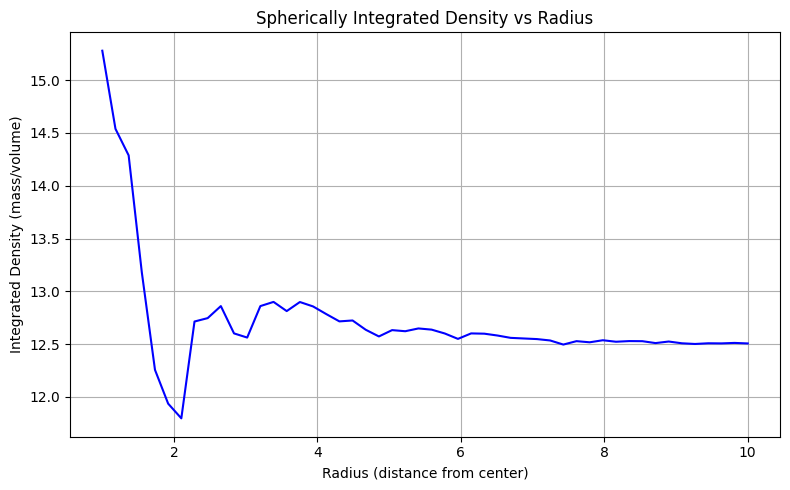

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(radii, integrated_densities, color='blue')
plt.title("Spherically Integrated Density vs Radius")
plt.xlabel("Radius (distance from center)")
plt.ylabel("Integrated Density (mass/volume)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Total mass and volume for computing average density
total_mass = np.sum(masses)
total_volume = (2 * L) ** 3  # Since particles are distributed in a cube from -L to L in all directions
average_density = total_mass / total_volume

# Compute overdensity delta(r)
overdensities = (integrated_densities - average_density) / average_density
print(total_mass)
print(N * m)


52389.0
100000


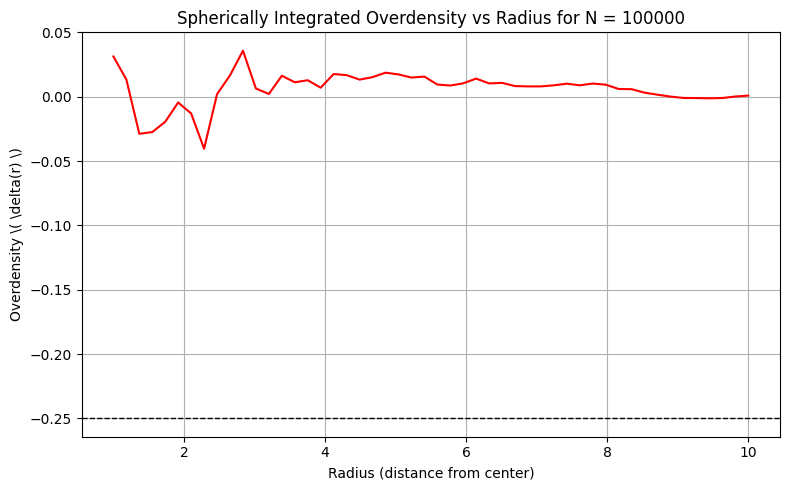

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(radii, overdensities, color='red')
plt.title("Spherically Integrated Overdensity vs Radius for N = 100000")
plt.xlabel("Radius (distance from center)")
plt.ylabel("Overdensity \( \delta(r) \)")
plt.axhline(-0.25, color='black', linestyle='--', linewidth=1)  # Reference line at delta = 0
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
d_exp = (N * m) / ((2 * L)**3)
print("Final integrated density:", integrated_densities[-1])
print("Expected density:", d_exp)
print("Overdensity at final shell:", (integrated_densities[-1] - d_exp) / d_exp)


Final integrated density: 12.5110109215108
Expected density: 12.5
Overdensity at final shell: 0.0008808737208640593


# Part 2 : Error Analysis for Random Distribution

## Multiple Iterations for the algorithm using N = 100000 for more even distribution for 200 iterations.

In [ ]:
realizations = 200  # Number of random realizations
N = 1000000
all_densities = np.zeros((realizations, shell_number))    #2D array to store densities for each iteration in separate rows

# Run multiple realizations
for r in range(realizations):
    x_coords = np.random.uniform(-L, L, N)
    y_coords = np.random.uniform(-L, L, N)
    z_coords = np.random.uniform(-L, L, N)

    masses = np.zeros(shell_number)

    dist_sq = x_coords**2 + y_coords**2 + z_coords**2   #Calculating square at once to avoid extremely long computation time

    for i in range(shell_number):
        r_sq = radii[i]**2
        if i == 0:
            mask = dist_sq <= r_sq
        else:
            mask = (radii[i-1]**2 < dist_sq) & (dist_sq <= r_sq)
        masses[i] = m * np.sum(mask)

    cumulative_masses = np.cumsum(masses)        #Total Sum of all shell masses within a particular shell
    integrated_densities = cumulative_masses / spherical_volumes
    all_densities[r, :] = integrated_densities

print(all_densities)

[[117.456348   116.16871483 118.50504643 ... 124.87532051 124.90482719
  124.9222268 ]
 [115.54648868 122.07071893 117.10427756 ... 124.92874048 124.96918549
  125.00864794]
 [112.68169971 111.56227261 117.57120052 ... 124.92233009 125.07266355
  125.13278879]
 ...
 [127.48310942 125.81345324 123.45442977 ... 124.94369807 124.97902852
  125.06546625]
 [125.33451768 124.37394005 120.74627662 ... 124.96640156 125.05903473
  125.05185851]
 [129.39296873 130.85174942 128.03027475 ... 124.86330102 124.89977948
  124.82410778]]


## Computing Mean and Standard Deviation

In [ ]:
mean_density = np.mean(all_densities, axis=0)
std_density = np.std(all_densities, axis=0)

print(mean_density)
print("======================================================================")
print(std_density)

[125.52311629 125.55290135 125.27262777 125.08575007 125.09680889
 125.0807341  125.13290709 125.09896264 125.02559089 125.03325138
 124.97609519 124.98841044 125.0049256  125.0151767  125.02777526
 125.02550444 125.00758186 125.04482668 125.01637937 125.03932587
 125.04214612 125.02332579 125.02001678 125.01126512 125.01968552
 125.03119905 125.02719914 125.01998168 125.01322348 125.01571922
 125.01964661 125.01481604 125.01188061 125.00437324 125.01304477
 125.0161901  125.00527321 125.00512433 125.01198845 125.01002158
 125.00937265 125.00771828 125.00629355 125.00220119 125.00506912
 125.00544607 125.00345253 125.00533136 125.00516935 125.00289449]
[5.74956627 4.87902373 3.9485332  3.23470122 2.63932421 2.18055777
 1.907164   1.66723414 1.40624296 1.30475245 1.16632357 1.03719923
 0.98275021 0.87341472 0.78297745 0.7487292  0.69250493 0.64198248
 0.58391717 0.54140555 0.52122389 0.47371198 0.43834966 0.41857141
 0.39209556 0.37391616 0.35601562 0.352069   0.33478521 0.31816689
 0.3

## Expected Density

In [ ]:
d_exp = (N * m) / ((2 * L)**3)    #Since it is a homogenous distribution the expected density at any radius is equal to the density of the cube
print(d_exp)

125.0


## Final plot of Errors Bars:



*   Dark Blue line denotes the mean at each point.
*   The Light Blue region denotes +- 1 standard deviation around that point.
*   The Dashed Red line denotes the expected density.





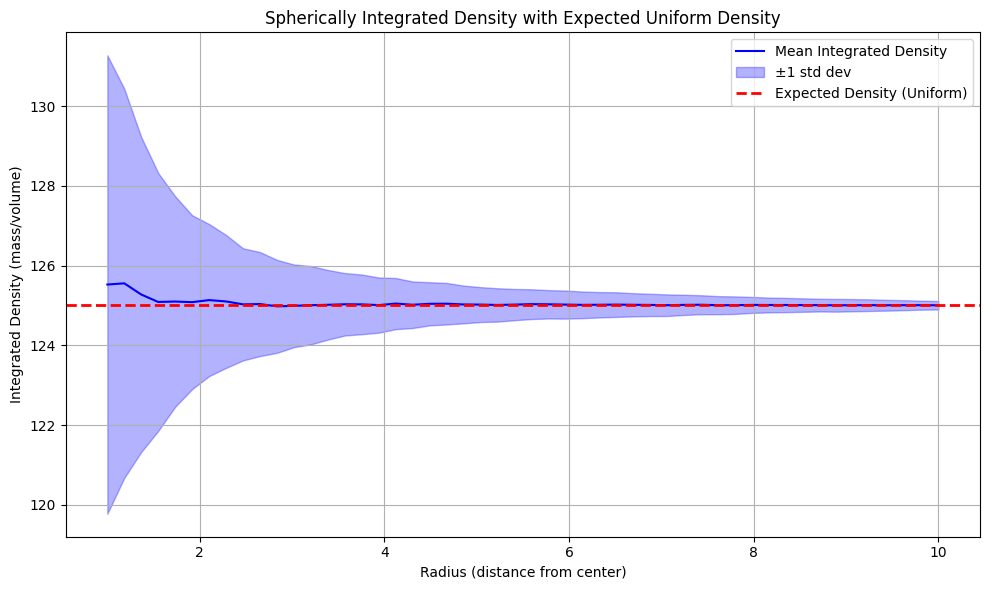

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(radii, mean_density, color='blue', label='Mean Integrated Density')
plt.fill_between(radii, mean_density - std_density, mean_density + std_density,
                 color='blue', alpha=0.3, label='±1 std dev')

# Overlay expected density as a horizontal line
plt.axhline(y=d_exp, color='red', linestyle='--', linewidth=2, label='Expected Density (Uniform)')

# Labels and plot settings
plt.title("Spherically Integrated Density with Expected Uniform Density")
plt.xlabel("Radius (distance from center)")
plt.ylabel("Integrated Density (mass/volume)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Part 3 : Gaussian Distribution




### The parameters for point generation are defined as follows :
*   Length of box is 20 for each axes and symmetric about origin.
*   Mass of each particle is assmued to be 1.
*   The number of points taken is 100000.
*   The Standard Deviation of the Sigma is 3.0

In [ ]:
L = 10
m = 1
N = 100000
sigma = 3.0

## Point Generation Block

In [ ]:
a, b = -L / sigma, L / sigma    #Bounds for the Standard Deviation to restrict points in [-L,L]
x_coords = truncnorm.rvs(a, b, loc=0, scale=sigma, size=N)
y_coords = truncnorm.rvs(a, b, loc=0, scale=sigma, size=N)
z_coords = truncnorm.rvs(a, b, loc=0, scale=sigma, size=N)

## Visulization of the Points Generated

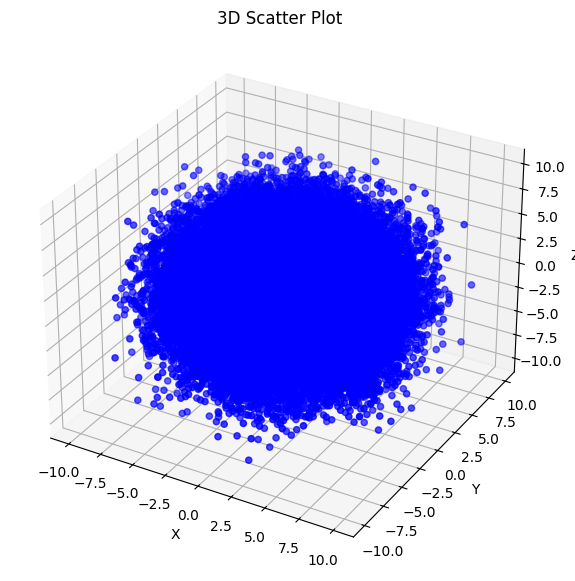

In [ ]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords, y_coords, z_coords, color='blue', marker='o')

ax.set_title("3D Scatter Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

## Defining Discretization array of Radius of Concentric Shells

In [ ]:
shell_number = 100      #The number of shells are 30 starting from r=0.30 and going till r=10
radii = np.linspace(0.5, L, num=shell_number)
print(radii)

[ 0.5         0.5959596   0.69191919  0.78787879  0.88383838  0.97979798
  1.07575758  1.17171717  1.26767677  1.36363636  1.45959596  1.55555556
  1.65151515  1.74747475  1.84343434  1.93939394  2.03535354  2.13131313
  2.22727273  2.32323232  2.41919192  2.51515152  2.61111111  2.70707071
  2.8030303   2.8989899   2.99494949  3.09090909  3.18686869  3.28282828
  3.37878788  3.47474747  3.57070707  3.66666667  3.76262626  3.85858586
  3.95454545  4.05050505  4.14646465  4.24242424  4.33838384  4.43434343
  4.53030303  4.62626263  4.72222222  4.81818182  4.91414141  5.01010101
  5.10606061  5.2020202   5.2979798   5.39393939  5.48989899  5.58585859
  5.68181818  5.77777778  5.87373737  5.96969697  6.06565657  6.16161616
  6.25757576  6.35353535  6.44949495  6.54545455  6.64141414  6.73737374
  6.83333333  6.92929293  7.02525253  7.12121212  7.21717172  7.31313131
  7.40909091  7.50505051  7.6010101   7.6969697   7.79292929  7.88888889
  7.98484848  8.08080808  8.17676768  8.27272727  8

## Density Calculation

In [ ]:
masses = np.zeros(shell_number)       #Array for the mass of a given shell
densities = np.zeros(shell_number)    #Array for the density of a given shell

for i in range(0,shell_number):
  for j in range(0, N):
    dist_sq = x_coords[j]*x_coords[j] + y_coords[j]*y_coords[j] + z_coords[j]*z_coords[j]     #Computes the square of distance of each point from the centre
    if(i == 0):
      if(dist_sq <= radii[i]*radii[i]):   #Checking if that point belongs to the first shell or not
        masses[i] += m
        vol = 4 * math.pi * (radii[i]**3) / 3
    else:
      if(radii[i-1]*radii[i-1] < dist_sq and dist_sq <= radii[i]*radii[i]):    #Checking if that point belongs to the corresponding shell or not
        masses[i] += m
        vol = 4 * math.pi * (radii[i]**3 - radii[i-1]**3) / 3

  densities[i] = masses[i]/vol

print(densities)

[240.64227395 250.67188213 229.56550303 201.18712252 235.94590934
 253.82673291 222.79541358 206.0809733  212.83215472 219.32575993
 205.92376498 202.80171422 212.148983   203.80036158 185.68923493
 194.676981   185.15133568 195.42632178 191.69142327 179.38914796
 164.42827984 165.37387784 165.3410093  159.95675896 149.33692588
 151.38997467 139.2097128  133.07633237 130.61941485 132.49462633
 127.66161516 120.82422897 115.86864309 108.41216765 112.37875266
 103.02134153  97.64223474  98.24466369  91.57546493  89.50738211
  82.16976963  81.58789976  77.05895468  73.22965849  70.06412514
  67.45590212  62.61553691  60.35197109  58.21347236  53.8184027
  52.26017337  46.54179023  46.31501407  42.20917565  42.37730235
  38.97434998  33.962675    35.42490653  31.41875134  30.37365462
  27.93672856  26.75920996  24.78929218  21.9214272   21.02094725
  19.56972178  17.97546225  17.44260655  15.79076666  15.31550035
  13.9240516   12.14466539  11.47810233  10.94599562  10.50973406
   9.581523

## Final Plot for Density Variation

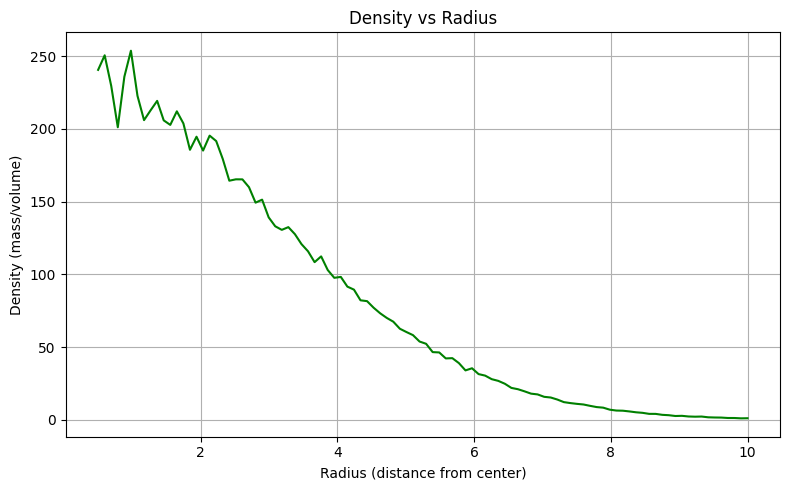

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(radii, densities, color='green')
plt.title("Density vs Radius")
plt.xlabel("Radius (distance from center)")
plt.ylabel("Density (mass/volume)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Total mass and volume of the full sphere (within radius L)
total_mass = np.sum(masses)
total_volume = (4 / 3) * math.pi * (L ** 3)

# Compute average density over the full sphere
average_density = total_mass / total_volume

# Compute overdensity in each shell
overdensities = (densities - average_density) / average_density


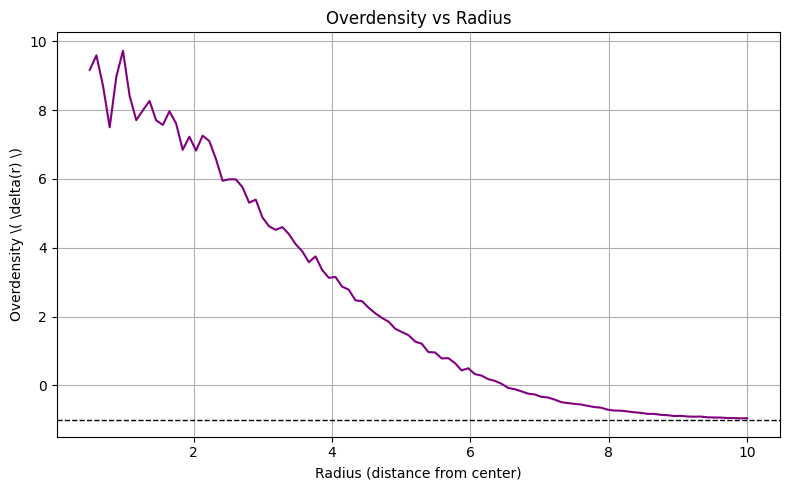

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(radii, overdensities, color='purple')
plt.title("Overdensity vs Radius")
plt.xlabel("Radius (distance from center)")
plt.ylabel("Overdensity \( \delta(r) \)")
plt.axhline(-1, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()


# Part 4 : Error Analysis for Gaussian Distribution

## Multiple Iterations for the algorithm using N = 100000 for 200 iterations.

In [ ]:
realizations = 200
N = 1000000

all_densities = np.zeros((realizations, shell_number))    #2D array to store densities for each iteration in separate rows
shell_volumes = np.zeros(shell_number)
for i in range(shell_number):
    if i == 0:
        shell_volumes[i] = (4/3) * math.pi * (radii[i]**3)
    else:
        shell_volumes[i] = (4/3) * math.pi * (radii[i]**3 - radii[i-1]**3)

for r in range(realizations):
    x_coords = truncnorm.rvs(a, b, loc=0, scale=sigma, size=N)
    y_coords = truncnorm.rvs(a, b, loc=0, scale=sigma, size=N)
    z_coords = truncnorm.rvs(a, b, loc=0, scale=sigma, size=N)

    dist_sq = x_coords**2 + y_coords**2 + z_coords**2

    masses = np.zeros(shell_number)

    for i in range(shell_number):
        r_sq = radii[i]**2
        if i == 0:
            mask = dist_sq <= r_sq
        else:
            mask = (radii[i-1]**2 < dist_sq) & (dist_sq <= r_sq)
        masses[i] = m * np.sum(mask)

    densities = masses / shell_volumes    # Compute shell-wise densities
    all_densities[r, :] = densities

print(all_densities)

[[2310.92977369 2338.68602122 2305.6361391  ...   11.92642192
    10.58554564    9.58696958]
 [2295.65089916 2443.36219178 2359.53412676 ...   12.2137007
    11.21726369    9.76280046]
 [2360.58611594 2391.0241065  2283.67769968 ...   12.97107202
    10.55993545    9.51161349]
 ...
 [2337.66780413 2311.13966054 2353.54546147 ...   11.43021313
    10.7135966     9.4027658 ]
 [2330.02836687 2377.25092616 2285.67392144 ...   11.92642192
    10.36359065    9.4111387 ]
 [2267.0030094  2250.53766706 2219.79860318 ...   11.69137565
    10.66237622    9.62046118]]


## Computing Mean and Standard Deviation

In [ ]:
mean_densities = np.mean(all_densities, axis=0)
std_densities = np.std(all_densities, axis=0)

print(mean_densities)
print("======================================================================")
print(std_densities)

[2342.20372001 2320.36769137 2300.82524464 2286.78662103 2266.01739938
 2252.27807726 2218.54808995 2195.98310005 2168.82094335 2143.61958263
 2108.43886935 2076.48894037 2045.74974135 2006.45761614 1970.0444764
 1934.69288441 1892.19731891 1852.31486476 1810.15014072 1767.78715518
 1723.48119097 1680.99073159 1634.96321111 1591.1346787  1544.32242794
 1501.04945141 1454.74340832 1409.82105329 1363.34813784 1317.55326917
 1273.16749414 1227.44458571 1183.97673354 1139.79309766 1094.59669483
 1053.02430483 1009.3444074   967.82200249  927.10852598  887.44000558
  847.86363232  810.08293804  772.31336424  735.25168453  700.57502066
  666.14197509  632.37279772  600.13030106  568.95484986  538.90420711
  510.28373702  482.05528657  454.89814367  429.17943689  403.88547572
  380.44484634  357.43101049  336.31171824  315.59883819  295.47043042
  276.56608549  258.95959516  242.05570112  225.68934298  210.78678549
  196.33629152  182.61340543  169.73232312  157.59338433  146.1760085
  135.56

In [ ]:
expected_densities = np.zeros(shell_number)

# Normalization constant for 3D Gaussian
prefactor = N / ((2 * np.pi * sigma**2)**1.5)

# Function for 3D radial density
def radial_density(r):
    return 4 * np.pi * r**2 * np.exp(-r**2 / (2 * sigma**2))

# Integrate probability mass in each shell
for i in range(shell_number):
    r1 = 0 if i == 0 else radii[i-1]
    r2 = radii[i]
    mass_i, _ = quad(radial_density, r1, r2)
    mass_i *= prefactor  # Scale by total number of particles
    expected_densities[i] = mass_i / shell_volumes[i]


##Final Plot of Error Bars

*   Dark Green line denotes the mean at each point.
*   The light green region denotes +- 1 standard deviation around that point.

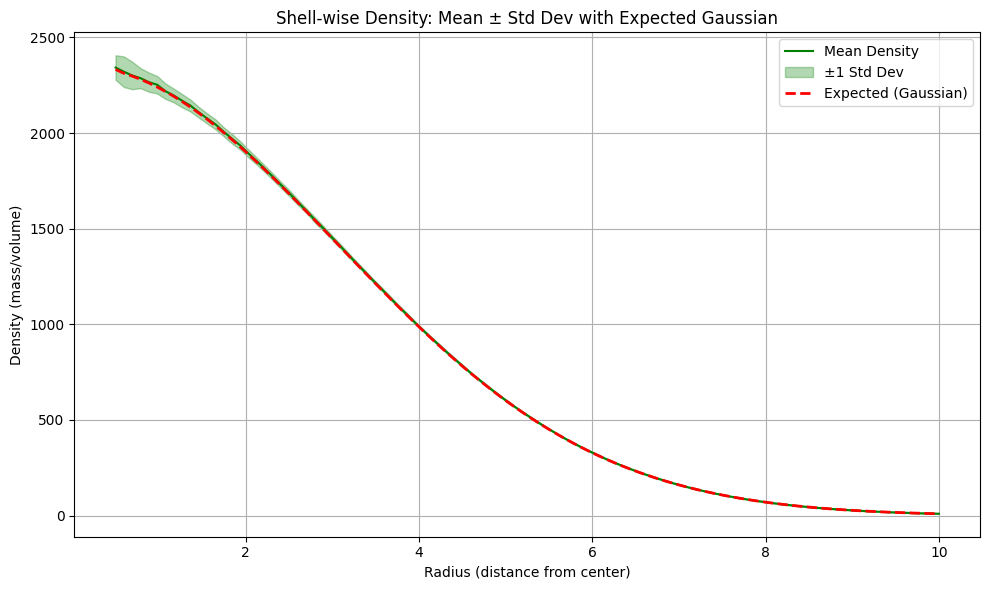

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(radii, mean_densities, color='green', label='Mean Density')
plt.fill_between(radii, mean_densities - std_densities, mean_densities + std_densities,
                 color='green', alpha=0.3, label='±1 Std Dev')

# Overlay expected Gaussian density
plt.plot(radii, expected_densities, color='red', linestyle='--', linewidth=2, label='Expected (Gaussian)')

plt.title("Shell-wise Density: Mean ± Std Dev with Expected Gaussian")
plt.xlabel("Radius (distance from center)")
plt.ylabel("Density (mass/volume)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Identify column names from the first comment line
columns = [
    'scale', 'id', 'desc_scale', 'desc_id', 'num_prog', 'pid', 'upid', 'desc_pid',
    'phantom', 'sam_Mvir', 'Mvir', 'Rvir', 'rs', 'vrms', 'mmp?', 'scale_of_last_MM',
    'vmax', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'Spin',
    'Breadth_first_ID', 'Depth_first_ID', 'Tree_root_ID', 'Orig_halo_ID', 'Snap_idx',
    'Next_coprogenitor_depthfirst_ID', 'Last_progenitor_depthfirst_ID',
    'Last_mainleaf_depthfirst_ID', 'Tidal_Force', 'Tidal_ID', 'Rs_Klypin', 'Mvir_all',
    'M200b', 'M200c', 'M500c', 'M2500c', 'Xoff', 'Voff', 'Spin_Bullock', 'b_to_a',
    'c_to_a', 'A[x]', 'A[y]', 'A[z]', 'b_to_a_500c', 'c_to_a_500c', 'A[x]_500c',
    'A[y]_500c', 'A[z]_500c', 'T_U_ratio', 'M_pe_Behroozi', 'M_pe_Diemer', 'Halfmass_Radius',
    'Macc', 'Mpeak', 'Vacc', 'Vpeak', 'Halfmass_Scale', 'Acc_Rate_Inst',
    'Acc_Rate_100Myr', 'Acc_Rate_1_Tdyn', 'Acc_Rate_2_Tdyn', 'Acc_Rate_Mpeak',
    'Acc_Log_Vmax_Inst', 'Acc_Log_Vmax_1_Tdyn', 'Mpeak_Scale', 'Acc_Scale', 'First_Acc_Scale',
    'First_Acc_Mvir', 'First_Acc_Vmax', 'Vmax_at_Mpeak', 'Tidal_Force_Tdyn',
    'Log_Vmax_Vmaxmax_Tdyn_Tmpeak', 'Time_to_future_merger', 'Future_merger_MMP_ID',
    'Spin_at_Mpeak_Scale'
]

# Read the file, skip comment lines starting with '#'
df = pd.read_csv('out_200.trees', comment='#', delim_whitespace=True, header=None, names=columns)

# Now you can use df
print(df.head())

<ipython-input-2-4244e2984867>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('out_200.trees', comment='#', delim_whitespace=True, header=None, names=columns)


   scale       id  desc_scale  desc_id  num_prog  pid  upid  desc_pid  \
0    1.0  6232111         0.0       -1         2   -1    -1        -1   
1    1.0  6227163         0.0       -1         1   -1    -1        -1   
2    1.0  6216872         0.0       -1         1   -1    -1        -1   
3    1.0  6209338         0.0       -1         1   -1    -1        -1   
4    1.0  6232128         0.0       -1         1   -1    -1        -1   

   phantom      sam_Mvir  ...  Acc_Scale  First_Acc_Scale  First_Acc_Mvir  \
0        0  9.248530e+14  ...        1.0              1.0    9.243000e+14   
1        0  6.868000e+14  ...        1.0              1.0    6.868000e+14   
2        0  6.476000e+14  ...        1.0              1.0    6.476000e+14   
3        0  6.224000e+14  ...        1.0              1.0    5.866000e+14   
4        0  5.585000e+14  ...        1.0              1.0    5.585000e+14   

   First_Acc_Vmax  Vmax_at_Mpeak  Tidal_Force_Tdyn  \
0         1535.53        1510.50            

In [ ]:
mass_threshold = 1e14

# Filter the halos
filtered_df = df[df['Mvir'] > mass_threshold]

# Select x, y, z and vx, vy, vz columns
result = filtered_df[['Mvir','Rvir', 'x', 'y', 'z', 'vx', 'vy', 'vz']]

# Print the first few rows
print(result.head())

           Mvir      Rvir          x          y          z      vx      vy  \
0  9.243000e+14  1976.273  189.24596  136.15475  120.90205  276.29  -72.89   
1  6.868000e+14  1789.999  178.82271  111.74517   23.02188  345.16  -75.54   
2  6.476000e+14  1755.210  198.28587   16.61077   43.09415   42.14 -398.44   
3  5.866000e+14  1698.362    8.12195  135.74565   83.84776 -220.10  206.76   
4  5.585000e+14  1670.795  149.32777  174.44043   99.41879   55.66 -243.98   

       vz  
0  -23.05  
1  362.27  
2  -47.94  
3  206.37  
4 -193.63  


In [ ]:
import h5py

filename = 'snapshot_200.hdf5'

with h5py.File(filename, 'r') as f:
    # Print top-level keys again
    print("Top-level keys:", list(f.keys()))

    # Now explore PartType1
    parttype1 = f['PartType1']
    print("PartType1 keys:", list(parttype1.keys()))


Top-level keys: ['Config', 'Header', 'Parameters', 'PartType1']
PartType1 keys: ['Acceleration', 'Coordinates', 'ParticleIDs', 'Potential', 'Velocities']


In [ ]:
import numpy as np

# Given point and radius
center = np.array([189.24596, 136.15475, 120.90205])

radius = 19.76273
vel = np.array([276.29, -72.89, -23.05])

# Open the file and read coordinates and velocities
with h5py.File('snapshot_200.hdf5', 'r') as f:
    coords = f['PartType1/Coordinates'][:]   # shape (N, 3)
    vels   = f['PartType1/Velocities'][:]    # shape (N, 3)
print(max(coords[0]))
print(min(coords[0]))
# Compute distance of each particle from the center
distances = np.linalg.norm(coords - center, axis=1)

# Create a mask for particles within the desired radius
mask = distances <= radius

# Apply mask to get filtered coordinates and velocities
filtered_coords = coords[mask]
filtered_vels   = vels[mask]

filtered_vels = filtered_vels - vel

# Optional: print number of particles found
print(f"Number of particles within radius: {filtered_coords.shape[0]}")

# Example: first 5 positions and velocities
print("First 5 positions:")
print(filtered_coords)
print("First 5 velocities:")
print(filtered_vels[:5])


76.336464
24.134718
Number of particles within radius: 131657
First 5 positions:
[[189.25424  136.34824  120.88043 ]
 [189.23906  136.35173  120.860435]
 [189.24187  136.37282  120.87555 ]
 ...
 [187.73233  136.04733  121.66723 ]
 [187.8675   136.23169  121.70266 ]
 [187.68379  136.02917  121.760544]]
First 5 velocities:
[[-331.90327744 -708.06733643 1205.3501709 ]
 [  14.22983643 -508.4672998   401.73969727]
 [1144.71427246  176.55889191 -170.10841675]
 [ 572.64530273  701.0596167  -924.98875732]
 [1133.83158203 -333.49882446  -54.72059174]]


In [ ]:
r = np.linalg.norm(coords - center, axis=1)
r_min = 1e-2  # in Mpc/h
r_max = radius / 1000  # convert Rvir to Mpc/h
m_particle = 1e30
n_bins = 30
bins = np.logspace(np.log10(r_min), np.log10(r_max), n_bins+1)  # Mpc/h

from scipy.stats import binned_statistic

# Count particles in each radial shell
counts, _, _ = binned_statistic(r, r, statistic='count', bins=bins)

# Volume of each shell
volumes = (4/3) * np.pi * (bins[1:]**3 - bins[:-1]**3)  # in (Mpc/h)^3

# Mass per shell
mass_shells = counts * m_particle  # Msun/h

# Density per shell
density = mass_shells / volumes  # (Msun/h) / (Mpc/h)^3

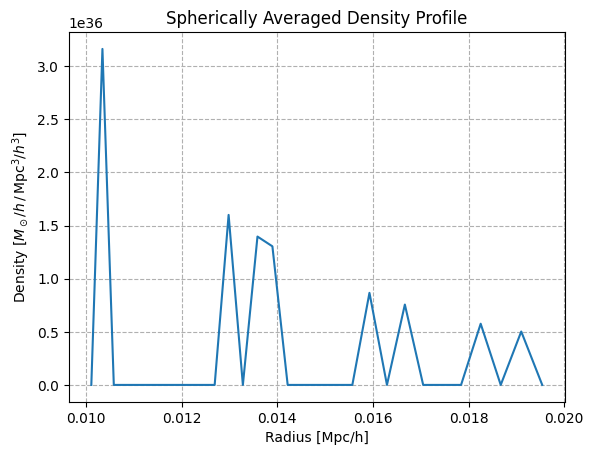

In [ ]:
import matplotlib.pyplot as plt

r_mid = 0.5 * (bins[1:] + bins[:-1])

plt.plot(r_mid, density)
plt.xlabel('Radius [Mpc/h]')
plt.ylabel('Density [$M_\\odot/h\\,/\\,\\mathrm{Mpc}^3/h^3$]')
plt.title('Spherically Averaged Density Profile')
plt.grid(True, which='both', ls='--')
plt.show()

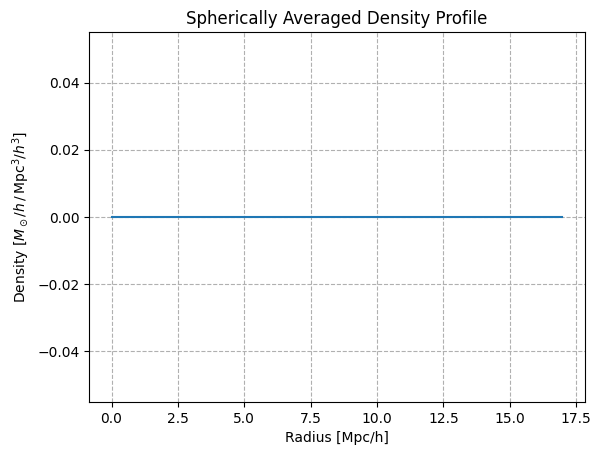

In [ ]:
# Convert coordinates to Mpc/h
coords_Mpc = coords / 1000.0  # from kpc/h to Mpc/h
r = np.linalg.norm(coords_Mpc - center, axis=1)

# Define bin edges in Mpc/h
r_min = 1e-3
r_max = radius  # already in Mpc/h
n_bins = 30
bins = np.logspace(np.log10(r_min), np.log10(r_max), n_bins+1)

# Compute density profile
from scipy.stats import binned_statistic

counts, _, _ = binned_statistic(r, r, statistic='count', bins=bins)
volumes = (4/3) * np.pi * (bins[1:]**3 - bins[:-1]**3)
mass_shells = counts * m_particle
density = mass_shells / volumes

# Midpoints and plot
r_mid = 0.5 * (bins[1:] + bins[:-1])
plt.plot(r_mid, density)
plt.xlabel('Radius [Mpc/h]')
plt.ylabel('Density [$M_\\odot/h\\,/\\,\\mathrm{Mpc}^3/h^3$]')
plt.title('Spherically Averaged Density Profile')
plt.grid(True, which='both', ls='--')
plt.show()


In [ ]:
print(f"Total mass in shells: {mass_shells.sum():.3e}")
print(f"Total particles counted: {counts.sum()}")

Total mass in shells: 0.000e+00
Total particles counted: 0.0


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# --- Halo center and radius (in Mpc/h) ---
center = np.array([189.24596, 136.15475, 120.90205])  # in Mpc/h
radius = 19.7623  # Rvir in Mpc/h

# --- Open the HDF5 snapshot and read data ---
with h5py.File('snapshot_200.hdf5', 'r') as f:
    coords = f['PartType1/Coordinates'][:]   # shape (N, 3), in kpc/h
    vels   = f['PartType1/Velocities'][:]    # shape (N, 3), in km/s

# --- Convert coordinates to Mpc/h ---
coords_Mpc = coords

# --- Compute distance of each particle from the halo center ---
r = np.linalg.norm(coords_Mpc - center, axis=1)

# --- Mask particles within halo radius ---
mask = r <= radius
filtered_coords = coords_Mpc[mask]
filtered_vels = vels[mask]

# --- Optional: relative velocities (subtract halo COM velocity) ---
halo_vel = np.array([276.29, -72.89, -23.05])
filtered_vels -= halo_vel

# --- Diagnostics ---
print(f"Total particles in snapshot: {coords.shape[0]}")
print(f"Particles within Rvir: {filtered_coords.shape[0]}")

# --- Mass per particle (assumed) ---
m_particle = 1e10  # Msun/h, replace with actual mass if known

# --- Density profile parameters ---
r_min = 1e-2  # Mpc/h
r_max = radius
n_bins = 30
bins = np.logspace(np.log10(r_min), np.log10(r_max), n_bins + 1)

# --- Histogram of particle counts in radial shells ---
counts, _, _ = binned_statistic(r[mask], r[mask], statistic='count', bins=bins)

# --- Volume of each spherical shell ---
volumes = (4/3) * np.pi * (bins[1:]**3 - bins[:-1]**3)

# --- Compute mass and density in each shell ---
mass_shells = counts * m_particle
density = mass_shells / volumes

# --- Midpoint radii for plotting ---
r_mid = 0.5 * (bins[1:] + bins[:-1])

# --- Plot the density profile ---
plt.figure(figsize=(8,6))
plt.plot(r_mid, density, marker='o', label='Simulated Profile')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius [Mpc/h]')
plt.ylabel('Density [$M_\\odot h^2/\\mathrm{Mpc}^3$]')
plt.title('Spherically Averaged Density Profile')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'snapshot_200.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)